# Recurrent Neural Networks

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [18]:
training_set = df_train.iloc[:,1].values.reshape(-1,1)

#normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

## Creating a data structure with 60 timesteps and 1 output

In [20]:
X_train = []
y_train = []
timesteps = 60

for i in range(timesteps, len(df_train)):
    X_train.append(training_set_scaled[i-timesteps:i, 0])
    y_train.append(training_set_scaled[i,0]) 

X_train, y_train = np.array(X_train), np.array(y_train)

#reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1) #(batch size, timesteps, number of features or predictors)

## Building the RNN

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'tanh', return_sequences = True, input_shape = (X_train.shape[1], 1))) 
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, activation = 'tanh', return_sequences = True)) 
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, activation = 'tanh', return_sequences = True)) 
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, activation = 'tanh', return_sequences = False)) 
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 36s 30ms/step - loss: 0.0505
Epoch 2/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0068
Epoch 3/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0060
Epoch 5/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0053
Epoch 6/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 48s 40ms/step - loss: 0.0016
Epoch 96/100
1198/1198 [==============================] - 46s 39ms/step - loss: 0.0018
Epoch 97/100
1198/1198 [==============================] - 48s 40ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 47s 39ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 49s 41ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 49s 41ms/step - loss: 0.0012


## Make predictions and visualize results

In [27]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = df_test.iloc[:,1].values.reshape(-1,1)

dataset_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0) 
inputs = dataset_total[len(dataset_total) - len(df_test) - timesteps:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(timesteps, timesteps + len(df_test)): #timesteps = 60, len(df_test) = 20
    X_test.append(inputs[i-timesteps:i, 0])    
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

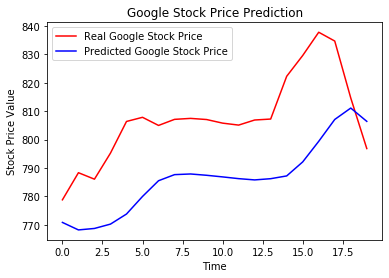

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price' )
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price Value')
plt.legend()
plt.show()